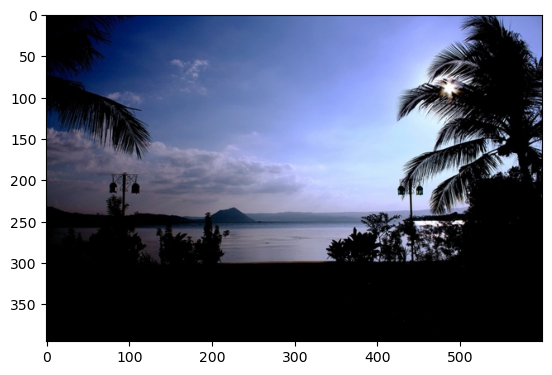

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read the original image
img = cv2.imread('nature.jpg')  
# converting because opencv uses BGR as default
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

Text(0.5, 1.0, 'Sobel-x edge detection')

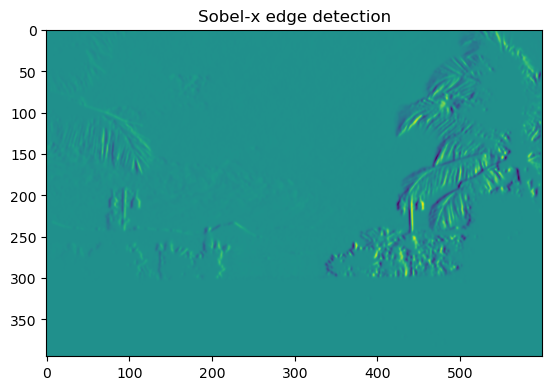

In [3]:
# converting to gray scale
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with sobel kernels
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

#Plotting images
plt.imshow(sobelx)
plt.title("Sobel-x edge detection")

#plt.imshow(sobely)
#plt.title("Sobel-y edge detection")

In [2]:
#Min Filter
# Importing Image and ImageFilter module from PIL package 
from PIL import Image, ImageFilter 

# creating a image object 
im1 = Image.open(r"flower1.jpg") 

# applying the min filter 
im2 = im1.filter(ImageFilter.MinFilter(size = 3)) 

im2.show() 

In [3]:
#Max Filter
# Importing Image and ImageFilter module from PIL package 
from PIL import Image, ImageFilter 

# creating a image object 
im1 = Image.open(r"flower1.jpg") 

# applying the max filter 
im2 = im1.filter(ImageFilter.MaxFilter(size = 3)) 

im2.show() 

In [5]:
#Array Filter
from PIL import Image

def apply_mean_filter(image):
    width, height = image.size
    filtered_image = Image.new("RGB", (width, height))

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Extract the neighborhood pixels
            pixels = [
                image.getpixel((x - 1, y - 1)),
                image.getpixel((x, y - 1)),
                image.getpixel((x + 1, y - 1)),
                image.getpixel((x - 1, y)),
                image.getpixel((x, y)),
                image.getpixel((x + 1, y)),
                image.getpixel((x - 1, y + 1)),
                image.getpixel((x, y + 1)),
                image.getpixel((x + 1, y + 1))
            ]

            # Compute the mean of the neighborhood pixels
            mean_pixel = (
                sum([pixel[0] for pixel in pixels]) // 9,
                sum([pixel[1] for pixel in pixels]) // 9,
                sum([pixel[2] for pixel in pixels]) // 9
            )

            # Set the pixel value in the filtered image
            filtered_image.putpixel((x, y), mean_pixel)

    return filtered_image

def main():
    # Load the input image
    input_image = Image.open("flower1.jpg")

    # Apply mean filter
    filtered_image = apply_mean_filter(input_image)

    # Save the filtered image
    filtered_image.save("filtered_image.jpg")

    print("Array filter applied successfully!")

if __name__ == "__main__":
    main()

Array filter applied successfully!


In [6]:
#1st and 2nd order derivative in sharpening filters
import cv2
import numpy as np

def sharpen_first_order(image):
    # Define the sharpening kernel for first-order derivative
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    # Apply the filter
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def sharpen_second_order(image):
    # Define the sharpening kernel for second-order derivative
    kernel = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

    # Apply the filter
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def main():
    # Load the input image
    input_image = cv2.imread("flower1.jpg")

    # Check if image is loaded successfully
    if input_image is None:
        print("Error: Image not loaded.")
        return

    # Apply first-order derivative sharpening filter
    sharpened_first_order = sharpen_first_order(input_image)

    # Apply second-order derivative sharpening filter
    sharpened_second_order = sharpen_second_order(input_image)

    # Display the original and sharpened images
    cv2.imshow("Original Image", input_image)
    cv2.imshow("Sharpened (First Order)", sharpened_first_order)
    cv2.imshow("Sharpened (Second Order)", sharpened_second_order)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [8]:
#Gaussian Filter
import cv2

def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=0):
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred_image

def main():
    # Load the input image
    input_image = cv2.imread("flower.jpg")

    # Check if image is loaded successfully
    if input_image is None:
        print("Error: Image not loaded.")
        return

    blurred_image = apply_gaussian_filter(input_image, kernel_size=(5, 5), sigma=0)

    # Display the original and blurred images
    cv2.imshow("Original Image", input_image)
    cv2.imshow("Blurred Image", blurred_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [10]:
# Linear Spatial Filter
import cv2

def apply_linear_filter(image, kernel):
    # Apply linear filter
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

def main():
    # Load the input image
    input_image = cv2.imread("flower1.jpg", cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded successfully
    if input_image is None:
        print("Error: Image not loaded.")
        return

    # Define the kernel for filtering (e.g., averaging kernel for blurring)
    kernel = 1/9 * np.ones((3, 3), dtype=np.float32)

    filtered_image = apply_linear_filter(input_image, kernel)

    # Display the original and filtered images
    cv2.imshow("Original Image", input_image)
    cv2.imshow("Filtered Image", filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [11]:
#Spatial correlation
import cv2
import numpy as np

def spatial_correlation(image, kernel):
    # Flip the kernel (180 degree rotation)
    kernel_flipped = np.flipud(np.fliplr(kernel))

    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Initialize the result array
    result = np.zeros_like(image)

    # Perform spatial correlation
    for y in range(image_height - kernel_height + 1):
        for x in range(image_width - kernel_width + 1):
            patch = image[y:y+kernel_height, x:x+kernel_width]
            correlation = np.sum(patch * kernel_flipped)
            result[y, x] = correlation

    return result

def main():
    # Load the input image
    input_image = cv2.imread("flower1.jpg", cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded successfully
    if input_image is None:
        print("Error: Image not loaded.")
        return

    # Define a kernel for spatial correlation (e.g., a simple 3x3 kernel)
    kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])

    correlated_image = spatial_correlation(input_image, kernel)

    # Display the original and correlated images
    cv2.imshow("Original Image", input_image)
    cv2.imshow("Correlated Image", correlated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main() 

In [17]:
#Convolution operation
import cv2
import numpy as np

def apply_convolution(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding needed to keep the output image size the same
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the input image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize the result array
    result = np.zeros_like(image)

    # Perform convolution
    for y in range(image_height):
        for x in range(image_width):
            # Extract the region of interest from the padded image
            roi = padded_image[y:y+kernel_height, x:x+kernel_width]
            # Apply convolution
            result[y, x] = np.sum(roi * kernel)

    return result

def main():
    # Load the input image
    input_image = cv2.imread("flower2.jpg", cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded successfully
    if input_image is None:
        print("Error: Image not loaded.")
        return

    # Define a kernel for convolution (e.g., a simple 3x3 kernel)
    kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])

    # Perform convolution
    convolved_image = apply_convolution(input_image, kernel)

    # Display the original and convolved images
    cv2.imshow("Original Image", input_image)
    cv2.imshow("Convolved Image", convolved_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()